In [21]:
# Importamos las librerías necesarias
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Cargamos el dataset diabetes.csv
df = pd.read_excel('farmacias_con_clusters.xlsx')
df = df.dropna()  # Eliminamos filas con valores nulos

# escribeme un codigo para normalizar la venta y trx
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#df[['venta', 'trx']] = scaler.fit_transform(df[['venta', 'trx']])
df.head()

,farmacia,tipofarmacia,venta,trx,nomina,sucursal,cluster,perfil
0,ECO CRUZ ROJA OTAVALO,FRANQUICIA,63026.8760,6949,4,ECONOMICAS,0,48
1,ECO MODERNA,FRANQUICIA,61003.9857,5700,4,ECONOMICAS,0,46
2,ECO OTAVALO COPACABANA,FRANQUICIA,47367.4135,6742,4,ECONOMICAS,0,47
3,ECO ANDINATEL OTAVALO,FRANQUICIA,44576.4200,5601,3,ECONOMICAS,0,51
4,ECO OTAVALO LOS CORAZAS,FRANQUICIA,42267.3465,5182,3,ECONOMICAS,0,48


In [23]:
# Convertir con map
mapping = {'PROPIA': 0, 'FRANQUICIA': 1}
df['tipofarmacia'] = df['tipofarmacia'].map(mapping)

mapping = {'ECONOMICAS': 0, 'MEDICITY': 1}
df['sucursal'] = df['sucursal'].map(mapping)

In [24]:
# Seleccionamos las columnas predictoras
X = df.drop('perfil', axis=1)
X = X.drop('farmacia', axis=1)
X.head()

,tipofarmacia,venta,trx,nomina,sucursal,cluster
0,1,63026.8760,6949,4,0,0
1,1,61003.9857,5700,4,0,0
2,1,47367.4135,6742,4,0,0
3,1,44576.4200,5601,3,0,0
4,1,42267.3465,5182,3,0,0


In [25]:
# Seleccionamos la columna diabetes como variable objetivo
y = df['perfil']
y.head()

0    48
1    46
2    47
3    51
4    48
Name: perfil, dtype: int64

In [26]:
# Importamos la función train_test_split de la librería sklearn
from sklearn.model_selection import train_test_split

# Dividimos la base de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [27]:
# Importamos los paquetes necesarios
from sklearn.linear_model import LinearRegression # Regresión lineal con scikit-learn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Creamos una instancia del modelo de regresión lineal
modelo_regresion = LinearRegression()

# Ajustamos el modelo a los datos de entrenamiento
modelo_regresion.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# Realizamos predicciones sobre el conjunto de prueba
y_pred = modelo_regresion.predict(X_test)

# Importamos las métricas para evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculamos las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Imprimimos las métricas de evaluación
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

Error Cuadrático Medio (MSE): 6.466338523985131
Coeficiente de Determinación (R^2): 0.16105105714349288
Error Absoluto Medio (MAE): 1.998747826196098


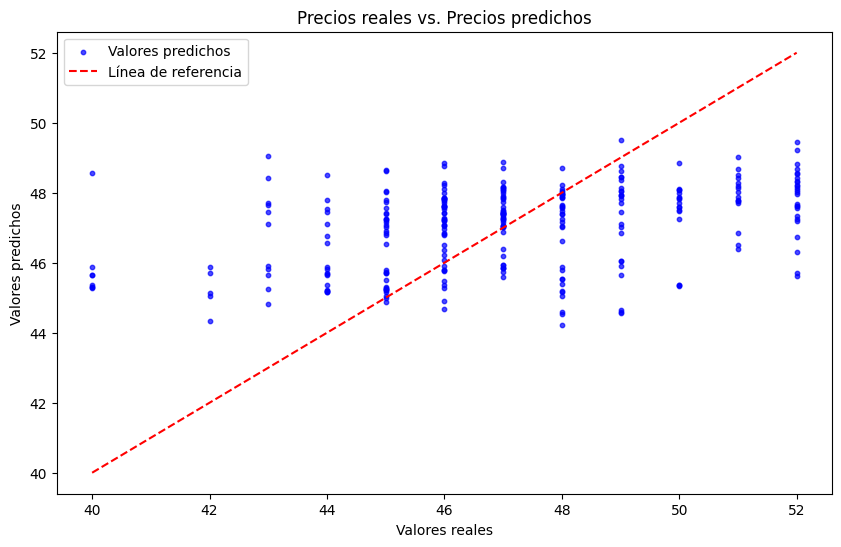

In [29]:
# Graficamos los valores reales vs los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, s=10)
plt.title('Precios reales vs. Precios predichos')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de referencia
plt.legend(['Valores predichos', 'Línea de referencia'])
plt.show()

In [31]:
# Definimos un nuevo caso de prueba con los siguientes valores

nuevo_caso = pd.DataFrame({
    'tipofarmacia': [0],  # 'PROPIA': 0, 'FRANQUICIA': 1
    'venta': [28109],  # Proporción de terrenos residenciales
    'trx': [8159],  # Proporción de acres comerciales
    'nomina': [2],  # Variable ficticia Charles River
    'sucursal': [0],  #{'ECONOMICAS': 0, 'MEDICITY': 1}
    'cluster': [11],  # Número medio de habitaciones por vivienda
    
})


# Realizamos la predicción con el nuevo caso de prueba
prediccion = modelo_regresion.predict(nuevo_caso)


# Imprimimos el resultado de la predicción
print(f'El perfil sugerido es: {prediccion[0]:.2f}')

El perfil sugerido es: 47.33


   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   -------------------------------------- - 524.3/545.3 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 545.3/545.3 kB 2.0 MB/s  0:00:00

   ---------------------------------------- 0/3 [slicer]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]

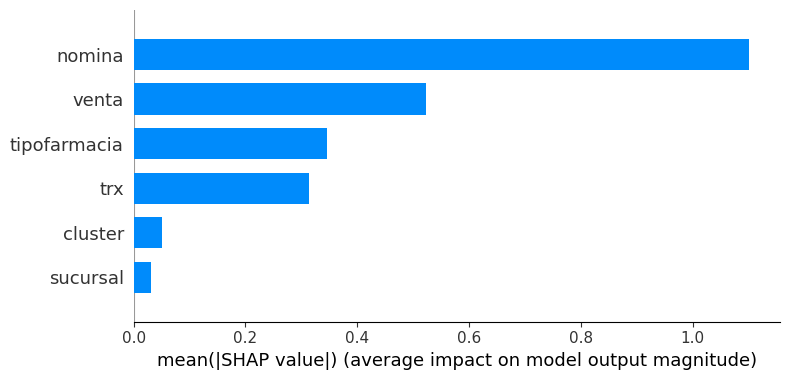

In [13]:
# PISTA
# Usa SHAP para explicar el modelo

# Instala SHAP
%pip install shap

# Importa SHAP
import shap 

# Crea un objeto explainer con el modelo y los datos de entrenamiento
explainer = shap.Explainer(modelo_regresion, X_train)

# Calcula los valores SHAP para todos los datos de prueba
shap_values = explainer(X_test)

# Grafica los valores SHAP
shap.summary_plot(shap_values, X_test, plot_type='bar')

# # Grafica los valores SHAP para un punto de datos específico
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])